# Training a Model for Building Detection Using HOG and SVM


## Super Special Thanks to the Following:
### Dataset for Training:
https://project.inria.fr/aerialimagelabeling/files/

### Lots of Code and Tutorial
https://www.udemy.com/autonomous-cars-deep-learning-and-computer-vision-in-python/

### Other Sources of Helpful Code and Hints:
https://news.developer.nvidia.com/ai-helps-detect-disaster-damage-from-satellite-imagery/  
https://research.fb.com/wp-content/uploads/2018/11/From-Satellite-Imagery-to-Disaster-Insights.pdf  
https://stackoverflow.com/questions/18262293/how-to-open-every-file-in-a-folder  
https://www.pyimagesearch.com/2018/04/16/keras-and-convolutional-neural-networks-cnns/  
https://ai.stackexchange.com/questions/3938/how-to-handle-images-of-large-sizes-in-cnn/4191  
https://towardsdatascience.com/boost-your-cnn-image-classifier-performance-with-progressive-resizing-in-keras-a7d96da06e20  
https://www.kaggle.com/lopuhin/full-pipeline-demo-poly-pixels-ml-poly  
https://gist.github.com/bigsnarfdude/d811e31ee17495f82f10db12651ae82d  


# DISPLAY IMAGES

In [20]:
import glob
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import hog 
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
#import training dataset of buildings
build_pos = glob.glob('../images/training/build_pos/0/*.jpg')
build_neg = glob.glob('../images/training/build_neg/0/*.jpg')


In [22]:
build_pos

['../images/training/build_pos/0/austin17.jpg',
 '../images/training/build_pos/0/chicago11.jpg',
 '../images/training/build_pos/0/tyrol-w27.jpg',
 '../images/training/build_pos/0/tyrol-w33.jpg',
 '../images/training/build_pos/0/kitsap10.jpg',
 '../images/training/build_pos/0/tyrol-w5.jpg',
 '../images/training/build_pos/0/vienna3.jpg',
 '../images/training/build_pos/0/vienna2.jpg',
 '../images/training/build_pos/0/tyrol-w4.jpg',
 '../images/training/build_pos/0/kitsap11.jpg',
 '../images/training/build_pos/0/tyrol-w32.jpg',
 '../images/training/build_pos/0/tyrol-w26.jpg',
 '../images/training/build_pos/0/chicago10.jpg',
 '../images/training/build_pos/0/austin16.jpg',
 '../images/training/build_pos/0/austin28.jpg',
 '../images/training/build_pos/0/austin14.jpg',
 '../images/training/build_pos/0/chicago12.jpg',
 '../images/training/build_pos/0/tyrol-w30.jpg',
 '../images/training/build_pos/0/tyrol-w24.jpg',
 '../images/training/build_pos/0/kitsap13.jpg',
 '../images/training/build_pos/0/

In [23]:
build_neg

['../images/training/build_neg/0/austin17.jpg',
 '../images/training/build_neg/0/chicago11.jpg',
 '../images/training/build_neg/0/tyrol-w27.jpg',
 '../images/training/build_neg/0/tyrol-w33.jpg',
 '../images/training/build_neg/0/kitsap10.jpg',
 '../images/training/build_neg/0/tyrol-w5.jpg',
 '../images/training/build_neg/0/vienna3.jpg',
 '../images/training/build_neg/0/vienna2.jpg',
 '../images/training/build_neg/0/tyrol-w4.jpg',
 '../images/training/build_neg/0/kitsap11.jpg',
 '../images/training/build_neg/0/tyrol-w32.jpg',
 '../images/training/build_neg/0/tyrol-w26.jpg',
 '../images/training/build_neg/0/chicago10.jpg',
 '../images/training/build_neg/0/austin16.jpg',
 '../images/training/build_neg/0/austin28.jpg',
 '../images/training/build_neg/0/austin14.jpg',
 '../images/training/build_neg/0/chicago12.jpg',
 '../images/training/build_neg/0/tyrol-w30.jpg',
 '../images/training/build_neg/0/tyrol-w24.jpg',
 '../images/training/build_neg/0/kitsap13.jpg',
 '../images/training/build_neg/0/

In [24]:
len(build_pos)

180

In [25]:
len(build_neg)

180

## This section for testing just one image

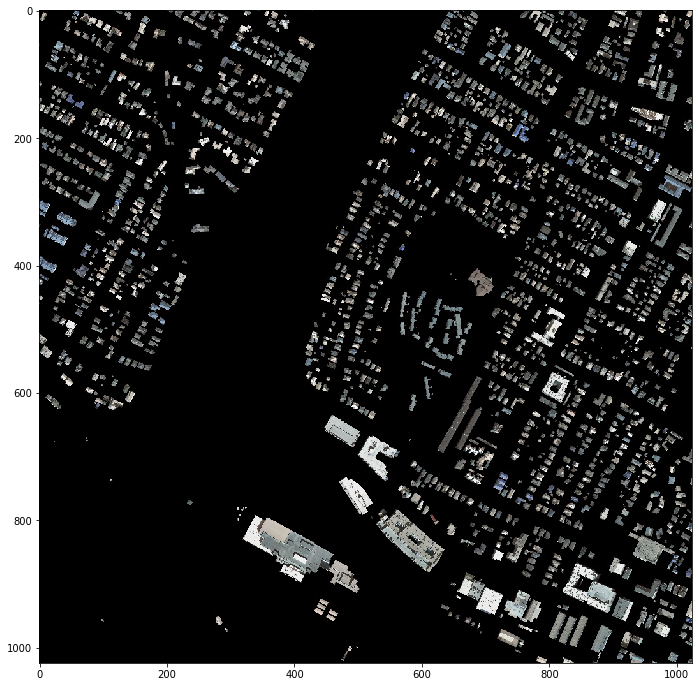

In [26]:
# random image
image_color = cv2.imread(build_pos[31]) 
plt.figure(figsize=(12,12))
plt.imshow(image_color)

(1024, 1024)

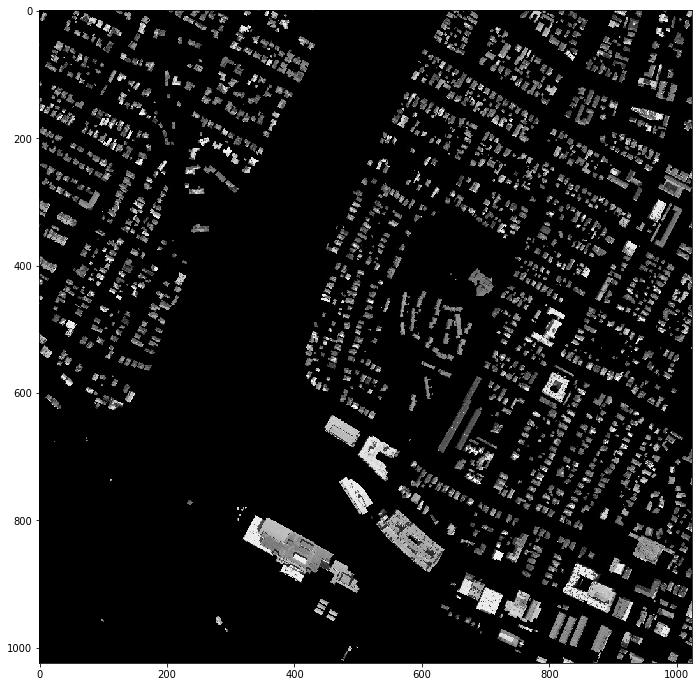

In [27]:
# same random image - grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))
plt.imshow(image_gray, cmap = 'gray')
image_gray.shape

## Get HOG Features

In [28]:
# histogram oriented gradients
# image must be greyscale
# https://kite.com/python/docs/skimage.feature._hog.hog

#Start timing
import time

start_time = time.time()

features, hog_image = hog(image_gray, 
                          orientations = 11, 
                          pixels_per_cell = (16, 16), 
                          cells_per_block = (2, 2), 
                          transform_sqrt = False, 
                          visualize = True,  # this is to return an image as well as the feature vector
                          feature_vector = True)
# this shows the number of features per one image
features.shape 

elapsed_time = time.time() - start_time
elapsed_min = elapsed_time / 60
print(f'Total Time: {round(elapsed_min, 3)} minutes.')

Total Time: 0.014 minutes.


In [29]:
features.shape

(174636,)

In [30]:
hog_image.shape

(1024, 1024)

In [31]:
hog_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

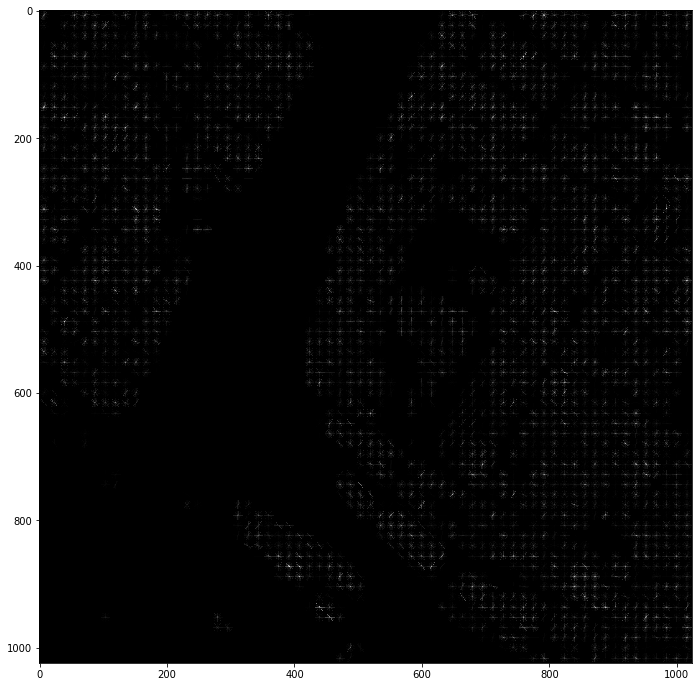

In [32]:
plt.figure(figsize=(12,12))
plt.imshow(hog_image, cmap = 'gray')


## Experimental Section

In [70]:
exp_image = cv2.imread('../images/training/build_mask/0/austin11.tif')
exp_image_gray = cv2.cvtColor(exp_image, cv2.COLOR_BGR2GRAY)

### Using Sklearn to draw contours / boxes
Also not working correctly because of SVC

In [77]:
from skimage import measure

In [78]:
contours = measure.find_contours(exp_image_gray, 0.8)

In [79]:
contours

[array([[0.00000000e+00, 9.74193548e-01],
        [1.00000000e+00, 9.74193548e-01],
        [2.00000000e+00, 9.74193548e-01],
        ...,
        [2.04700000e+03, 9.74193548e-01],
        [2.04800000e+03, 9.74193548e-01],
        [2.04900000e+03, 9.74193548e-01]]), array([[0. , 4.2],
        [1. , 4.2],
        [2. , 4.2],
        [3. , 4.2],
        [4. , 4.2],
        [5. , 4.2],
        [6. , 4.2],
        [7. , 4.2],
        [7.2, 4. ],
        [7. , 3.8],
        [6. , 3.8],
        [5. , 3.8],
        [4. , 3.8],
        [3. , 3.8],
        [2. , 3.8],
        [1. , 3.8],
        [0. , 3.8]]), array([[2.2, 9. ],
        [2. , 8.8],
        [1.2, 8. ],
        [1. , 7.8],
        [0.8, 8. ],
        [0.8, 9. ],
        [1. , 9.2],
        [2. , 9.2],
        [2.2, 9. ]]), array([[ 0. , 10.2],
        [ 0.2, 10. ],
        [ 0. ,  9.8]]), array([[ 3.6, 11. ],
        [ 3. , 10.4],
        [ 2. , 10.8],
        [ 1. , 10.8],
        [ 0.8, 11. ],
        [ 1. , 11.2],
        [ 2. 

In [80]:
len(contours)

57352

Contour 1000 of 57352 contours.
Contour 2000 of 57352 contours.
Contour 3000 of 57352 contours.
Contour 4000 of 57352 contours.
Contour 5000 of 57352 contours.
Contour 6000 of 57352 contours.
Contour 7000 of 57352 contours.
Contour 8000 of 57352 contours.
Contour 9000 of 57352 contours.
Contour 10000 of 57352 contours.
Contour 11000 of 57352 contours.
Contour 12000 of 57352 contours.
Contour 13000 of 57352 contours.
Contour 14000 of 57352 contours.
Contour 15000 of 57352 contours.
Contour 16000 of 57352 contours.
Contour 17000 of 57352 contours.
Contour 18000 of 57352 contours.
Contour 19000 of 57352 contours.
Contour 20000 of 57352 contours.
Contour 21000 of 57352 contours.
Contour 22000 of 57352 contours.
Contour 23000 of 57352 contours.
Contour 24000 of 57352 contours.
Contour 25000 of 57352 contours.
Contour 26000 of 57352 contours.
Contour 27000 of 57352 contours.
Contour 28000 of 57352 contours.
Contour 29000 of 57352 contours.
Contour 30000 of 57352 contours.
Contour 31000 of 57

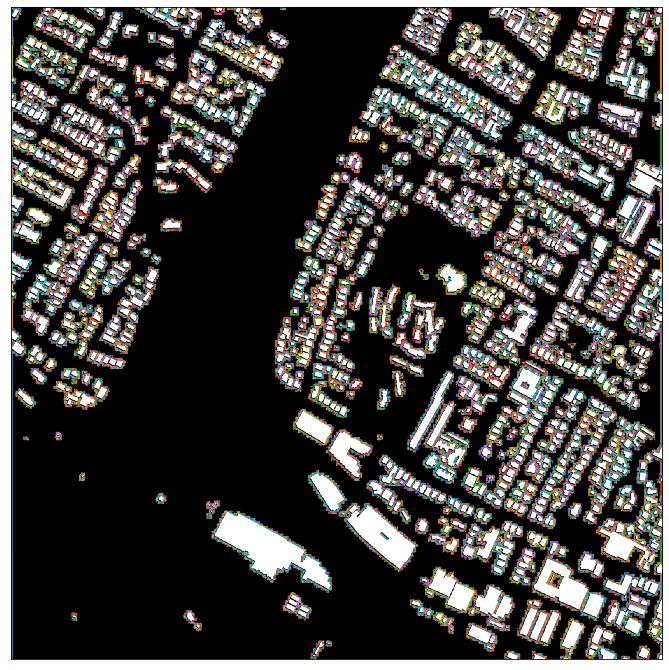

In [87]:
#Start timing
start_time = time.time()

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(12,12))                       
ax.imshow(exp_image_gray, cmap=plt.cm.gray)

i=1

for contour in contours:
    if i%1000 == 0:
        print(f'Contour {i} of {len(contours)} contours.')
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
    i+=1

#ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])

#Finish time
elapsed_time = time.time() - start_time
elapsed_min = elapsed_time / 60
print(f'Total Time: {round(elapsed_min, 3)} minutes.')

## Get HOG Features for All Images

### Positive Class

In [33]:
# list to store all of the features
build_pos_hog_accum = []

#Start timing
start_time = time.time()

# take all of the images and get and store hog features
for i in build_pos:
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    build_pos_hog_feature, build_hog_pos_img = hog(image_gray, 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    build_pos_hog_accum.append(build_pos_hog_feature)

#Finish time
elapsed_time = time.time() - start_time
elapsed_min = elapsed_time / 60
print(f'Total Time: {round(elapsed_min, 3)} minutes.')

Total Time: 2.499 minutes.


In [34]:
X_build_pos = np.vstack(build_pos_hog_accum).astype(np.float64)  

In [35]:
# ones because all of these are the positive class
y_build_pos = np.ones(len(X_build_pos))

In [36]:
X_build_pos.shape

(180, 174636)

In [37]:
X_build_pos

array([[0.30517186, 0.00246144, 0.30517186, ..., 0.23938185, 0.08655545,
        0.12716044],
       [0.33758252, 0.0681922 , 0.04775961, ..., 0.06601437, 0.00121642,
        0.13157664],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00128907, 0.        , 0.00045575, ..., 0.2949859 , 0.15608342,
        0.21558579],
       [0.        , 0.        , 0.        , ..., 0.24757314, 0.06711542,
        0.10871701],
       [0.        , 0.        , 0.        , ..., 0.1851421 , 0.15693672,
        0.22653057]])

In [38]:
y_build_pos.shape

(180,)

### Negative Class

In [39]:
build_neg_hog_accum = []

#Start timing
start_time = time.time()

for i in build_neg:
    #changed this from image_color to image_gray because the image is already in grayscale
    image_color = mpimg.imread(i)
    image_gray  = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

    build_neg_hog_feature, build_neg_hog_img = hog(image_gray, 
                                    orientations = 11, 
                                    pixels_per_cell = (16, 16), 
                                    cells_per_block = (2, 2), 
                                    transform_sqrt = False, 
                                    visualize = True, 
                                    feature_vector = True)
                
    build_neg_hog_accum.append(build_neg_hog_feature)

#Finish time
elapsed_time = time.time() - start_time
elapsed_min = elapsed_time / 60
print(f'Total Time: {round(elapsed_min, 3)} minutes.')

Total Time: 2.56 minutes.


In [40]:

X_build_neg = np.vstack(build_neg_hog_accum).astype(np.float64)  
# zeros because negative class
y_build_neg = np.zeros(len(X_build_neg))



In [41]:
X_build_neg.shape

(180, 174636)

In [42]:
X_build_neg

array([[0.15339261, 0.10533512, 0.04098707, ..., 0.06003242, 0.00978363,
        0.02207903],
       [0.27054751, 0.0433457 , 0.02880044, ..., 0.10204037, 0.08056313,
        0.11422953],
       [0.20621796, 0.13055215, 0.16949442, ..., 0.30872722, 0.11638577,
        0.04735237],
       ...,
       [0.11688743, 0.10829066, 0.11941914, ..., 0.19634353, 0.15158351,
        0.12905568],
       [0.20458237, 0.16303843, 0.07972055, ..., 0.21844124, 0.18251679,
        0.16091197],
       [0.09031695, 0.04098753, 0.12239985, ..., 0.10182332, 0.10770662,
        0.13458408]])

In [43]:
y_build_neg.shape

(180,)

In [44]:

X = np.vstack((X_build_pos, X_build_neg))
X.shape

(360, 174636)

In [45]:
y = np.hstack((y_build_pos, y_build_neg))
y.shape

(360,)

## SVM Classifier Training

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77)

In [47]:
# These were the best results from multiple gridsearches, feel free to change
param_grid = {'C': [1], 'gamma': [0.001], 'kernel': ['rbf']} 


grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4, n_jobs=-1)

grid.fit(X_train,y_train)
print(grid.best_params_)
print()
print(grid.best_estimator_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/chris/anaconda3/envs/tensor/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.7s finished


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Use Joblib to Export the Best Params Fitted Model

In [29]:
import joblib

# Save to file in the current working directory
directory = os.path.relpath('../data/')

In [95]:
file_to_save = "grid_svc_trained_model.pkl"
joblib.dump(grid, (directory+'/'+file_to_save))

['../data/grid_svc_trained_model.pkl']

In [31]:
# # Only if loading the file later!
# # Load from file
# file_to_load = 'grid_svc_trained_model.pkl'
# model_import = joblib.load(file_to_load)
# # afterwards can use the model as it was.

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        44
         1.0       1.00      0.98      0.99        46

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



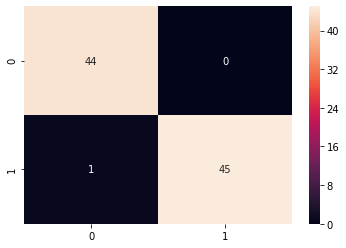

In [48]:
grid_predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True)
print(classification_report(y_test,grid_predictions))

## Outline buildings

#### Currently Not Working Properly!! :(

**To Do:**  
- Test on an original image, but resize
- SVC is not classifying properly, it is classifying an entire image as 1 or 0, instead of masked regions

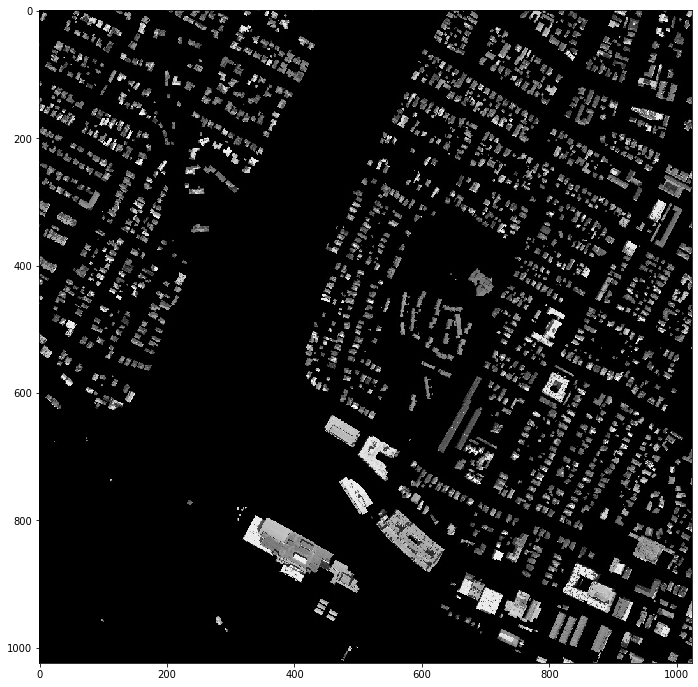

In [65]:
test_image = mpimg.imread('../images/training/build_pos/0/austin11.jpg')
test_image_gray  = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))
plt.imshow(test_image_gray, cmap='gray')
test_image_gray = test_image_gray.astype(np.float32)

In [50]:
print(test_image_gray.shape)
test_image_gray

(1024, 1024)


array([[160., 108., 129., ...,   1.,   1.,   0.],
       [107.,  95., 134., ...,   0.,   0.,   3.],
       [114.,  94., 120., ...,   1.,   0.,   2.],
       ...,
       [106., 106., 124., ...,   2.,   1.,   1.],
       [110., 123.,  79., ...,   2.,   0.,   1.],
       [186.,  87., 229., ...,   0.,   1.,   1.]], dtype=float32)

In [51]:
hog_test, hog_test_img = hog(test_image_gray, 
                                orientations = 11, 
                                pixels_per_cell = (16, 16), 
                                cells_per_block = (2, 2), 
                                transform_sqrt = False, 
                                visualize = True, 
                                feature_vector = True)

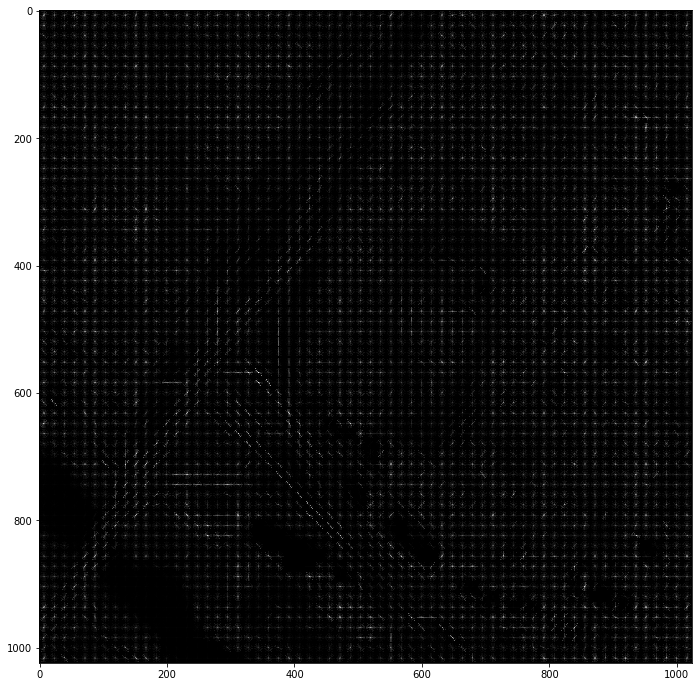

In [52]:
plt.figure(figsize=(12,12))
plt.imshow(hog_test_img, cmap='gray')

In [53]:
hog_test.shape

(174636,)

In [54]:
X_test_validator = hog_test.astype(np.float64)
X_test_validator.shape

(174636,)

(1024, 1024, 3)

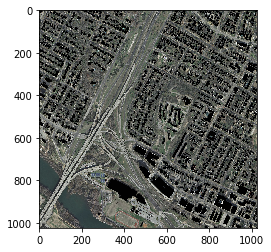

In [55]:
h_start = 0
h_stop = 1024

pixels_in_cell = 16
HOG_orientations = 11
cells_in_block = 2
cells_in_step = 3 


masked_region = test_image[h_start:h_stop,:,:]
plt.imshow(masked_region)
masked_region.shape


In [56]:
resizing_factor = 2
masked_region_shape = masked_region.shape
L = masked_region_shape[1]/resizing_factor
W = masked_region_shape[0]/resizing_factor

(512, 512, 3)


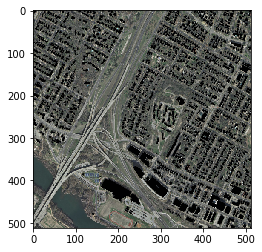

In [57]:
masked_region_resized = cv2.resize(masked_region, (np.int(L), np.int(W)))
masked_region_resized_R = masked_region_resized[:,:,0]

print(masked_region_resized.shape)
plt.imshow(masked_region_resized)


In [58]:
    
# print(masked_region_resized_R.shape)    
print(f'Test image shape: {test_image.shape}')
# masked_region_hog_feature_all, hog_img = hog(masked_region_resized_R, 
#                                              orientations = 11, 
#                                              pixels_per_cell = (16, 16), 
#                                              cells_per_block = (2, 2), 
#                                              transform_sqrt = False, 
#                                              visualize = True, 
#                                              feature_vector = False)


#Start timing
start_time = time.time()


masked_region_hog_feature_all, hog_img = hog(test_image, 
                                orientations = 11, 
                                pixels_per_cell = (16, 16), 
                                cells_per_block = (2, 2), 
                                transform_sqrt = False, 
                                visualize = True, 
                                feature_vector = False)
                


#Finish time
elapsed_time = time.time() - start_time
elapsed_min = elapsed_time / 60
print(f'Total Time: {round(elapsed_min, 3)} minutes.')

Test image shape: (1024, 1024, 3)


In [59]:
hog_img.shape

(1024, 1024)

In [60]:
masked_region_hog_feature_all.shape

(63, 63, 2, 2, 11)

In [61]:
X_test_validator = masked_region_hog_feature_all.astype(np.float64)  

In [62]:
n_blocks_x = (masked_region_resized_R.shape[1] // pixels_in_cell)+1  
n_blocks_y = (masked_region_resized_R.shape[0] // pixels_in_cell)+1

#nfeat_per_block = orientations * cells_in_block **2 
blocks_in_window = (64 // pixels_in_cell)-1 
    
steps_x = (n_blocks_x - blocks_in_window) // cells_in_step
steps_y = (n_blocks_y - blocks_in_window) // cells_in_step

rectangles_found = []

for xb in range(steps_x):
    for yb in range(steps_y):
        y_position = yb*cells_in_step
        x_position = xb*cells_in_step
            
        hog_feat_sample = masked_region_hog_feature_all[y_position : y_position + blocks_in_window, x_position : x_position + blocks_in_window].ravel()
        x_left = x_position * pixels_in_cell
        y_top = y_position * pixels_in_cell
        print(hog_feat_sample.shape)  
        
        # predict using trained SVM
#        test_prediction = svc_model.predict(hog_feat_sample.reshape(1,-1))
        test_prediction = grid.predict(masked_region_hog_feature_all.reshape(1,-1))
        
        if test_prediction == 1: 
            rectangle_x_left = np.int(x_left * resizing_factor)
            rectangle_y_top = np.int(y_top * resizing_factor)
            window_dim = np.int(64 * resizing_factor)
            rectangles_found.append(((rectangle_x_left, rectangle_y_top + h_start),(rectangle_x_left + window_dim, rectangle_y_top + window_dim + h_start)))
                

(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)
(396,)


In [63]:
rectangles_found

[]

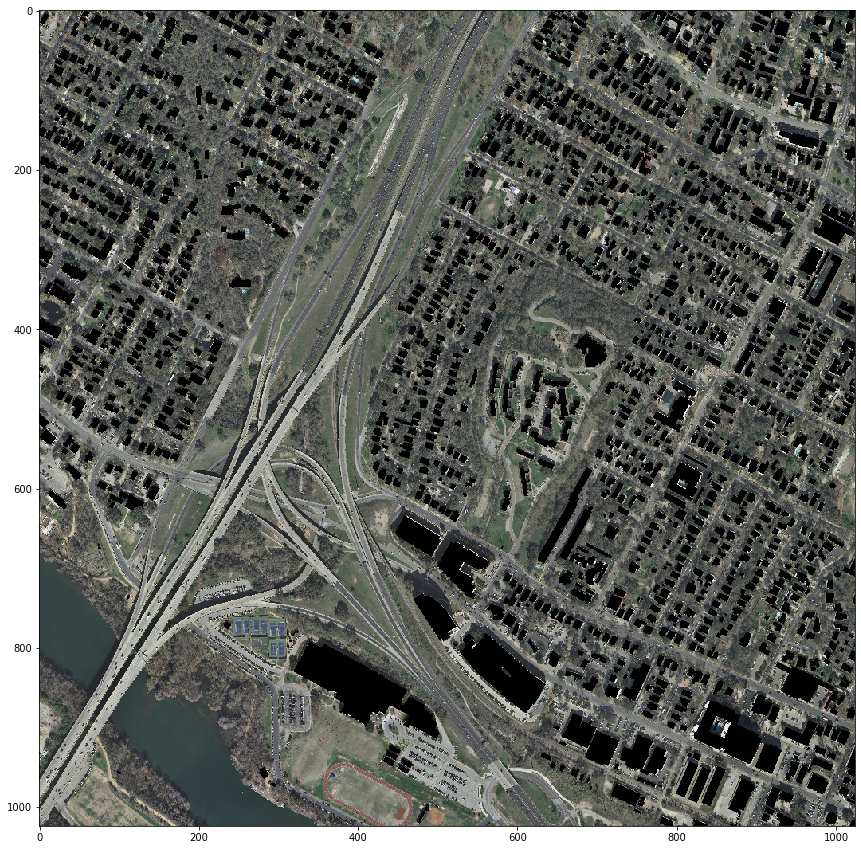

In [64]:
Image_with_Rectangles_Drawn = np.copy(test_image)
    
for rectangle in rectangles_found:
    cv2.rectangle(Image_with_Rectangles_Drawn, rectangle[0], rectangle[1], (255, 0, 0), 1)
plt.figure(figsize=(15,15))
plt.imshow(Image_with_Rectangles_Drawn)
        

### Using Sklearn to draw contours / boxes
Also not working correctly because of SVC

In [78]:
from skimage import measure

KeyboardInterrupt: 

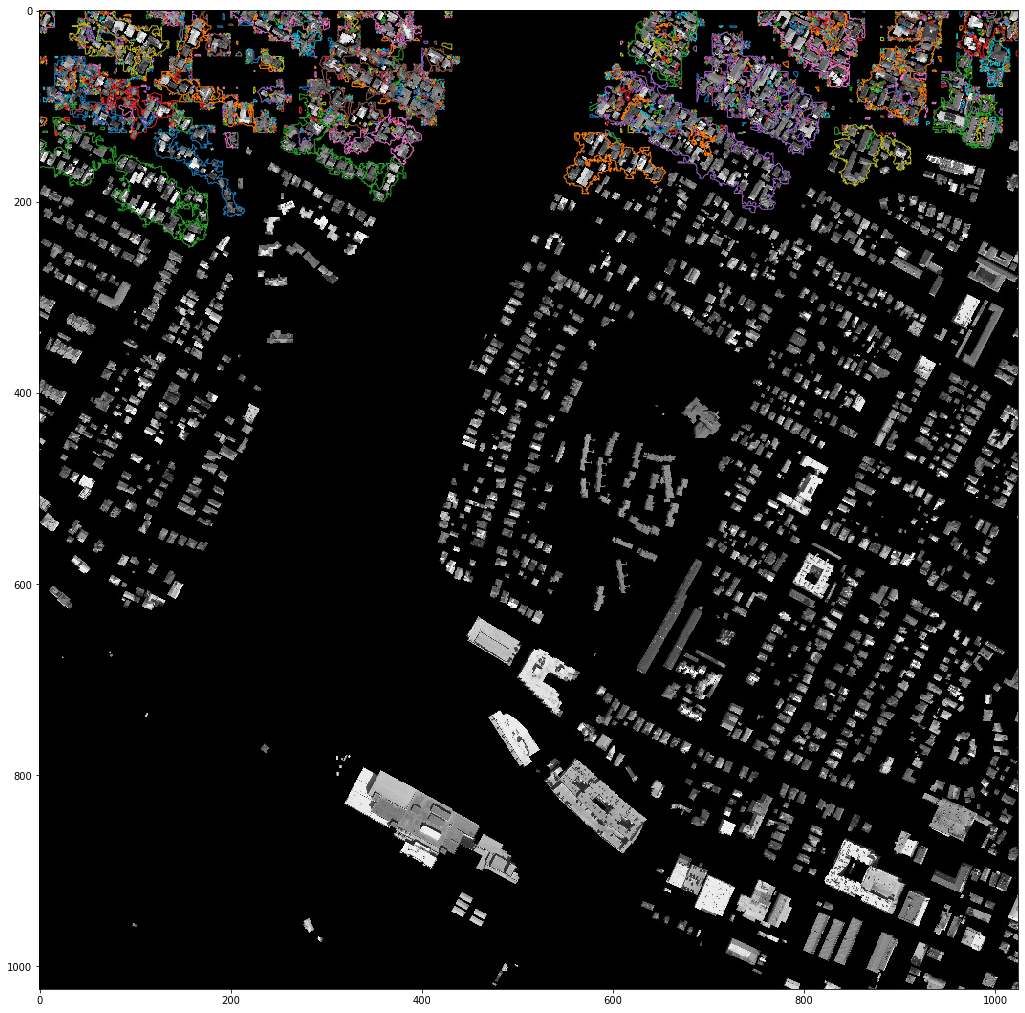

In [87]:
contours = measure.find_contours(test_image_gray, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(12,12))

                       
ax.imshow(test_image_gray, cmap=plt.cm.gray)


for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)


#ax.axis('image')
axleft.set_xticks([])
axleft.set_yticks([])
axright.set_xticks([])
axright.set_yticks([])

### Using OpenCV to draw boxes

In [88]:
def __bound_contours(roi):
    """
        returns modified roi(non-destructive) and rectangles that founded by the algorithm.
        @roi region of interest to find contours
        @return (roi, rects)
    """

    roi_copy = roi.copy()
    roi_hsv = cv2.cvtColor(roi, cv2.COLOR_RGB2HSV)
    # filter black color
    mask1 = cv2.inRange(roi_hsv, np.array([0, 0, 0]), np.array([180, 255, 125]))
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
    mask1 = cv2.Canny(mask1, 100, 300)
    mask1 = cv2.GaussianBlur(mask1, (1, 1), 0)
    mask1 = cv2.Canny(mask1, 100, 300)

    # mask1 = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)))

    # Find contours for detected portion of the image
    im2, cnts, hierarchy = cv2.findContours(mask1.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5] # get largest five contour area
    rects = []
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        x, y, w, h = cv2.boundingRect(approx)
        if h >= 15:
            # if height is enough
            # create rectangle for bounding
            rect = (x, y, w, h)
            rects.append(rect)
            cv2.rectangle(roi_copy, (x, y), (x+w, y+h), (0, 255, 0), 1);

    return (roi_copy, rects) 

In [89]:
__bound_contours(test_image)

(array([[[  1,   3,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 95, 106, 108],
         [ 66,  78,  76],
         [ 78,  90,  86]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  2,   2,   0],
         ...,
         [102, 113, 117],
         [147, 159, 159],
         [124, 136, 134]],
 
        [[  1,   1,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [173, 186, 194],
         [173, 187, 190],
         [172, 186, 187]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 57,  59,  56],
         [ 43,  45,  42],
         [ 47,  49,  46]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 91,  93,  90],
         [ 38,  40,  37],
         [165, 167, 164]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [107, 109, 106],
  

### Open CV Attempt #2

In [93]:
# read and scale down image
# wget https://bigsnarf.files.wordpress.com/2017/05/hammer.png #black and white
# wget https://i1.wp.com/images.hgmsites.net/hug/2011-volvo-s60_100323431_h.jpg
img = cv2.pyrDown(cv2.imread('../images/training/build_pos/0/austin11.jpg', cv2.IMREAD_UNCHANGED))

# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
                127, 255, cv2.THRESH_BINARY)
# find contours and get the external one

contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
#                cv2.CHAIN_APPROX_SIMPLE)

# with each contour, draw boundingRect in green
# a minAreaRect in red and
# a minEnclosingCircle in blue
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a red 'nghien' rectangle
    cv2.drawContours(img, [box], 0, (0, 0, 255))

    # finally, get the min enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    center = (int(x), int(y))
    radius = int(radius)
    # and draw the circle in blue
    img = cv2.circle(img, center, radius, (255, 0, 0), 2)

print(len(contours))
cv2.drawContours(img, contours, -1, (255, 255, 0), 1)

cv2.imshow("contours", img)

cv2.imshow("contours", img)

while True:
    key = cv2.waitKey(1)
    if key == 27: #ESC key to break
        break

cv2.destroyAllWindows()

ValueError: too many values to unpack (expected 2)